In this demo, we will train a Simple Linear Regression model to learn the correlation between the number of years of experience of each employee and their respective salary. Once the model is trained, we will be able to do some predictions.

# Import the libraries

In [1]:
import numpy as np #a Python library used for working with arrays
import matplotlib.pyplot as plt # a plotting library
import pandas as pd # a library for data manipulation and analysis

## Load the dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Data preprocessing

In [4]:
# Extract dependent and independent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Extracting independent variable:
In the above code, the first colon(:) is used to take all the rows, and the second colon(:) is for all the columns. Here we have used :-1, because we don't want to take the last column as it contains the dependent variable. So by doing this, we will get the matrix of features.

Extracting dependent variable:
To extract dependent variables, again, we will use Pandas .iloc[] method.
Here we have taken all the rows with the last column only. It will give the array of dependent variables.

In [5]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [6]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [8]:
print(X_train)

[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]


In [9]:
print(X_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


In [10]:
print(y_train)

[116969.  43525. 109431. 101302. 113812.  39891.  37731. 105582.  60150.
  81363.  57081.  54445. 112635.  46205.  66029.  39343.  67938. 121872.
 122391.  57189.  64445.  56957.  55794.  56642.]


In [11]:
print(y_test)

[83088. 98273. 63218. 93940. 61111. 91738.]


# Apply techniques

Training the Simple Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
lm.intercept_

25609.89799835482

In [14]:
lm.coef_

array([9332.94473799])

Predicting the Test set results

In [15]:
# make prediction
y_pred = lm.predict(X_test)

In [16]:
y_pred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [17]:
y_test # actual values

array([83088., 98273., 63218., 93940., 61111., 91738.])

Let us compare are see how well our model did. — our basic model did pretty well.

If we take the first employee — the actual salary is 83088 and our model predicted 75074.5 — which is not too bad. There are some predictions that are off but some are pretty close.

In [18]:
X_pred = lm.predict(X_train)

Visualising the Training set results (the regression line)

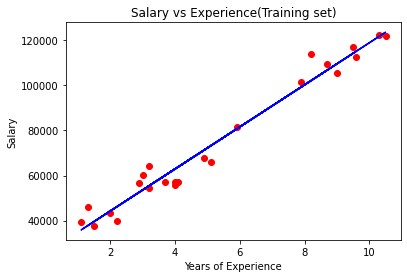

In [19]:
# First we’ll plot the actual data points of training set — X_train and y_train
plt.scatter(X_train, y_train, color = 'red')
# Next we’ll plot the regression line — which is the predicted values for the X_train
plt.plot(X_train,X_pred, color ='blue' )
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualising the Test set results

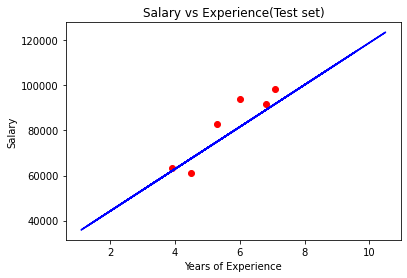

In [20]:
# First we’ll plot the actual data points of test set — X_test and y_test
plt.scatter(X_test, y_test, color = 'red')
# Next we’ll plot the regression line — which is the same as above
plt.plot(X_train,X_pred, color ='blue' )
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [21]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[75074.51 83088.  ]
 [91873.81 98273.  ]
 [62008.38 63218.  ]
 [81607.57 93940.  ]
 [67608.15 61111.  ]
 [89073.92 91738.  ]]


# Make new predictions

In [22]:
# We can also make brand new predictions for data points that do not exist in the dataset. Like for a person with 10 years experience
new_salary_pred = lm.predict([[10]])